In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import os
from main import ChessDataset
from scipy import stats
import numpy as np
import pandas as pd

op = os.path
root = "data/train"
ds = ChessDataset(root)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
X = []
for img, ann in ds:
    X.append(len(ann['boxes']))

In [23]:
for img, ann in ds:
    if len(ann['boxes']) == 1:
        print(ann['labels'])

['black-queen']
['white-king']
['white-bishop']
['white-pawn']
['black-pawn']
['black-knight']
['black-knight']
['black-bishop']
['white-king']
['white-queen']
['black-king']
['white-knight']
['black-bishop']
['black-pawn']
['black-knight']
['white-knight']
['white-knight']
['white-pawn']
['white-bishop']
['white-knight']
['black-pawn']
['black-queen']
['black-knight']
['white-queen']
['black-rook']
['white-queen']
['black-knight']
['black-knight']
['white-knight']
['black-bishop']
['white-king']
['black-knight']
['black-knight']
['white-bishop']
['black-knight']
['black-knight']
['white-knight']
['black-king']
['white-rook']
['white-rook']
['black-knight']
['white-knight']
['black-queen']
['white-bishop']
['black-bishop']
['black-bishop']
['white-rook']
['white-queen']
['white-queen']
['white-knight']
['black-knight']
['black-knight']
['white-knight']
['black-knight']
['black-rook']
['black-king']
['black-queen']
['white-rook']
['black-pawn']
['black-pawn']
['white-knight']
['white-kn

In [11]:
s = pd.Series(X)
s.value_counts().sort_index()

1     102
2       1
3       1
5       1
7       2
8       5
9       6
10      4
11      1
12      5
13      1
14      5
15      2
16      3
17      2
18      3
19      4
20      4
21      4
22      5
23      3
24      5
25      4
27      5
28      2
29      1
30      1
31      1
32     19
dtype: int64

In [12]:
mu = s.mean()

In [13]:
mu

10.435643564356436

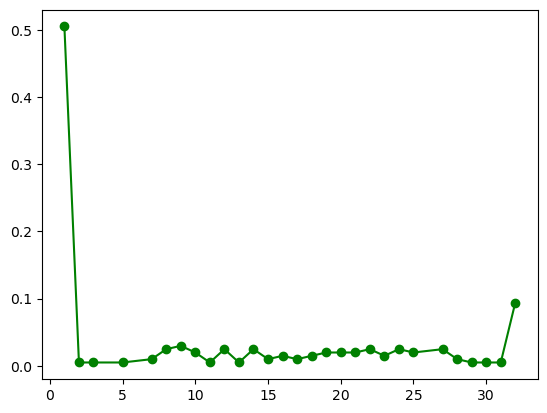

In [18]:
f_obs = s.value_counts().sort_index()
plt.plot(f_obs.index, f_obs.values / f_obs.sum(), '-go')

In [17]:
pois = stats.poisson(mu)

In [21]:
f_exp = pois.pmf(np.arange(1, 33))

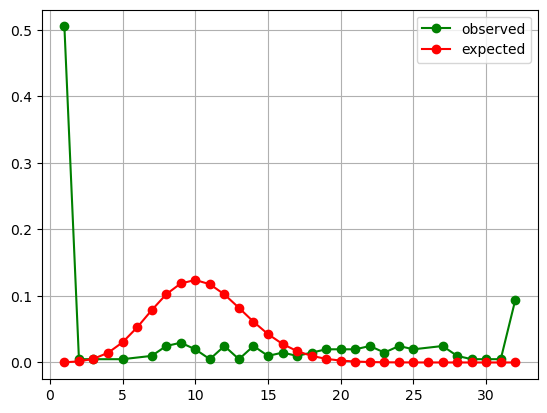

In [22]:
f_obs = s.value_counts().sort_index()
plt.plot(f_obs.index, f_obs.values / f_obs.sum(), '-go', label='observed')
plt.plot(np.arange(1, 33), f_exp, '-ro', label='expected')
plt.grid()
plt.legend()

<AxesSubplot:ylabel='Density'>

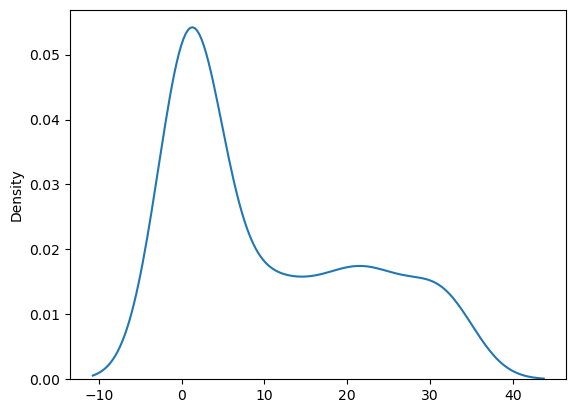

In [26]:
import seaborn as sns
sns.kdeplot(s)
# sns.kdeplot(pois.rvs(size=(len(s),)))